# Goal
> 1. Which categories on YouTube are the most popular by number of subscribers and views?
> 2. Visualization of the countries with the largest number of popular channels on the map.
> 3. Relationship between the economic indicators of a country (population, unemployment rate and others) and the success of channels from this country.
> 4. Relation between channel activity (number of videos) and its popularity.
> 5. How does subscriber growth depend on the channel creation date.

# Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import statsmodels.api as sm

In [2]:
df = pd.read_csv('Global YouTube Statistics.csv', encoding='latin-1')
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [4]:
df.isna().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [5]:
df.columns = df.columns.str.lower()
df.columns

Index(['rank', 'youtuber', 'subscribers', 'video views', 'category', 'title',
       'uploads', 'country', 'abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'gross tertiary education enrollment (%)', 'population',
       'unemployment rate', 'urban_population', 'latitude', 'longitude'],
      dtype='object')

# 1. Which categories on YouTube are the most popular by number of subscribers and views?


In [6]:
distribution_by_categories = df.groupby('category').agg({
    'subscribers' : 'sum',
    'video views' : 'sum'
}).reset_index()
distribution_by_categories

,category,subscribers,video views
0,Autos & Vehicles,35700000,1.500346e+10
1,Comedy,1388500000,5.501128e+11
2,Education,1194400000,6.966145e+11
3,Entertainment,5158200000,2.527739e+12
4,Film & Animation,1314900000,5.444225e+11
5,Gaming,1960100000,7.176389e+11
6,Howto & Style,775600000,2.018175e+11
7,Movies,51300000,1.538326e+10
8,Music,5195000000,3.121478e+12
9,News & Politics,536400000,2.703919e+11


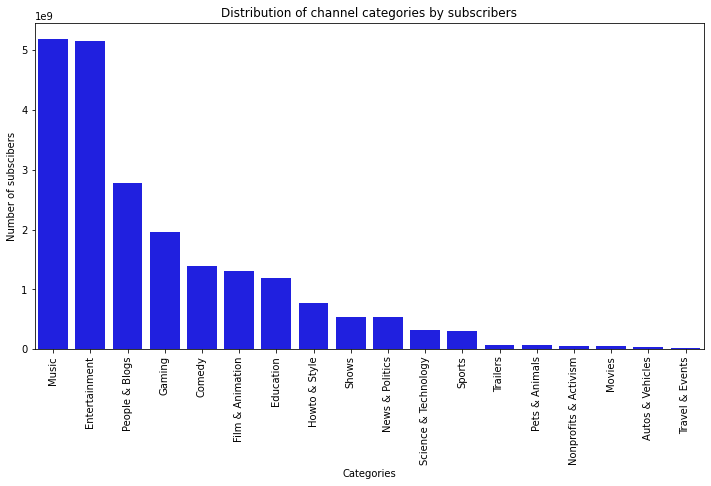

In [7]:
# sort distribution_by_categories dataframe descending order based on 'subscribers' column.
distribution_by_categories.sort_values(by='subscribers', ascending=False, inplace=True)

plt.figure(figsize=(12,6))

ax = sns.barplot(data=distribution_by_categories, x='category', y='subscribers', color='blue')

# Rotate the category labels on the x-axis for better readability.
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Set the title and labels for the axes of the plot.
plt.title ('Distribution of channel categories by subscribers')
plt.xlabel('Categories')
plt.ylabel('Number of subscibers')

# Display the plot.
plt.show()

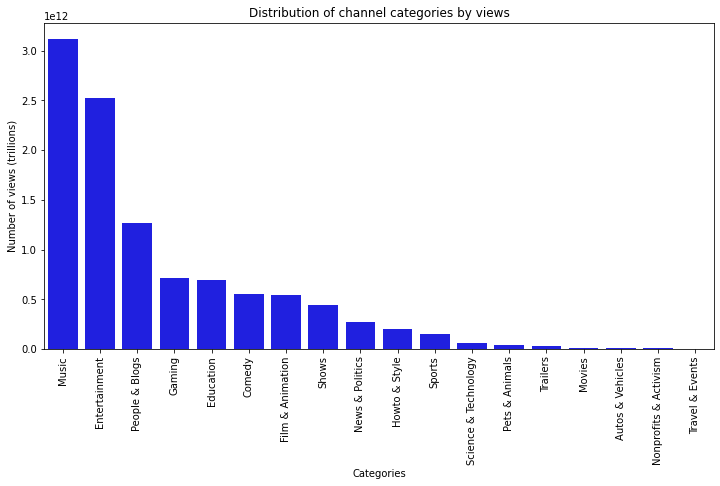

In [8]:
distribution_by_categories.sort_values(by='video views', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=distribution_by_categories, x='category', y='video views', color='blue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title ('Distribution of channel categories by views')
plt.xlabel('Categories')
plt.ylabel('Number of views (trillions)')

plt.show()

Music and Entertainment based on subscribers and views have largest number. The lowest number are Trailers, Movies, Autos & Vehicle, Nonprofits & Activism, Travel & Events

# 2. Visualization of the countries with the largest number of popular channels on the map.


In [9]:
df['country'] = df['country'].replace('United States', 'United States of America')
df['country']

0                         India
1      United States of America
2      United States of America
3      United States of America
4                         India
                 ...           
990                      Brazil
991                       India
992              United Kingdom
993                      Sweden
994                       India
Name: country, Length: 995, dtype: object

In [10]:
# Group the dataframe 'df' by the 'country' column, calculate the size of each group (i.e., the count of channels per country),
# sort the counts in descending order, and reset the dataframe index.
country_counts = df.groupby('country').size().sort_values(ascending=False).reset_index(name='count_channels')
country_counts.head()

,country,count_channels
0,United States of America,313
1,India,168
2,Brazil,62
3,United Kingdom,43
4,Mexico,33


In [11]:
# Define the URL for the geoJSON data hosted on GitHub.
geo_data_url = 'world.geo.json-master/countries.geo.json'

# Create a base map with a starting location and zoom level.
m = folium.Map(location=[20, 0], zoom_start=2)

# Add a choropleth layer to the map using the geoJSON data and the country_counts data.
# This layer will visualize the distribution of channel counts across different countries using shades of the 'YlOrBr' color palette.
# The 'bins' define the color breakpoints.
folium.Choropleth(
    geo_data=geo_data_url,
    name='choropleth',
    data=country_counts,
    columns=['country', 'count_channels'],
    key_on='feature.properties.name',
    fill_color='YlOrBr',
    bins=[0, 1, 10, 20, 30, 50, 175, 350],
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Number of Channels'
).add_to(m)

# Add a layer control widget to the map to allow for toggling between map layers.
folium.LayerControl().add_to(m)

# Display the map
m

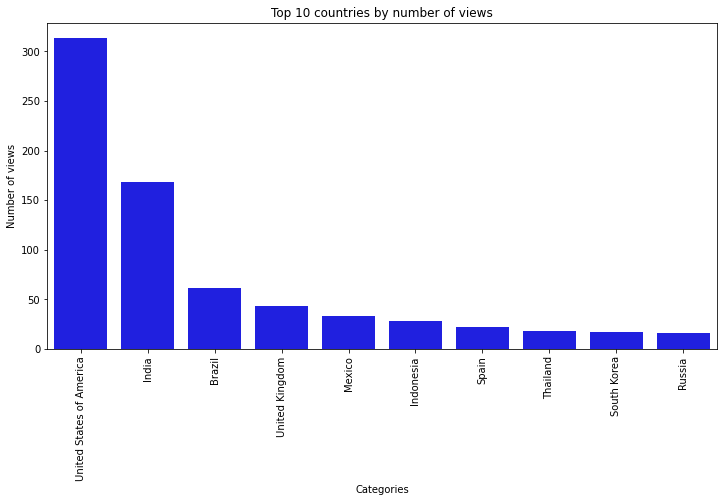

In [12]:
top15 = country_counts.head(10)
top15

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top15, x='country', y='count_channels', color='blue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title ('Top 10 countries by number of views')
plt.xlabel('Categories')
plt.ylabel('Number of views')

plt.show()

# 3. Relationship between the economic indicators of a country (population, unemployment rate and others) and the success of channels from this country.

In [13]:
mean_subscribers = df.groupby('country')['subscribers'].mean().reset_index()
mean_subscribers.head()


,country,subscribers
0,Afghanistan,2.040000e+07
1,Andorra,1.510000e+07
2,Argentina,2.526923e+07
3,Australia,1.911111e+07
4,Bangladesh,1.390000e+07


In [14]:
first_rows = df.drop_duplicates(subset='country')
first_rows.head()


,rank,youtuber,subscribers,video views,category,title,uploads,country,abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,gross tertiary education enrollment (%),population,unemployment rate,urban_population,latitude,longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States of America,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,...,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
7,8,PewDiePie,111000000,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,NaN,2010.0,Apr,29.0,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756


In [15]:
mean_subscribers = pd.merge(mean_subscribers, first_rows[['country', 'population', 'unemployment rate', 'urban_population']], on='country')
mean_subscribers.head()

,country,subscribers,population,unemployment rate,urban_population
0,Afghanistan,2.040000e+07,38041754.0,11.12,9797273.0
1,Andorra,1.510000e+07,NaN,NaN,NaN
2,Argentina,2.526923e+07,44938712.0,9.79,41339571.0
3,Australia,1.911111e+07,25766605.0,5.27,21844756.0
4,Bangladesh,1.390000e+07,167310838.0,4.19,60987417.0


In [16]:
mean_subscribers.dropna(inplace=True)
mean_subscribers.head()

,country,subscribers,population,unemployment rate,urban_population
0,Afghanistan,2.040000e+07,38041754.0,11.12,9797273.0
2,Argentina,2.526923e+07,44938712.0,9.79,41339571.0
3,Australia,1.911111e+07,25766605.0,5.27,21844756.0
4,Bangladesh,1.390000e+07,167310838.0,4.19,60987417.0
5,Barbados,4.190000e+07,287025.0,10.33,89431.0


In [17]:
mean_subscribers.columns = ['country', 'mean_subscribers', 'population', 'unemployment_rate', 'urban_population']
mean_subscribers.head()

,country,mean_subscribers,population,unemployment_rate,urban_population
0,Afghanistan,2.040000e+07,38041754.0,11.12,9797273.0
2,Argentina,2.526923e+07,44938712.0,9.79,41339571.0
3,Australia,1.911111e+07,25766605.0,5.27,21844756.0
4,Bangladesh,1.390000e+07,167310838.0,4.19,60987417.0
5,Barbados,4.190000e+07,287025.0,10.33,89431.0


In [18]:
# calculate correlation coefficient
correlation = mean_subscribers['unemployment_rate'].corr(mean_subscribers['mean_subscribers'])
correlation



-0.1365365104538854

In [19]:
# Define x as the unemployment rate and y as the number of subscribers from the mean_subscribers dataframe
x = mean_subscribers['unemployment_rate']
y = mean_subscribers['mean_subscribers']

# Fit a linear regression model to the data
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Create a dataframe for the trend line using the model
trend_df = pd.DataFrame({
    'unemployment_rate': x,
    'Trend': p(x)
})

In [20]:
# Plot a scatter plot with the original data, and overlay the trend line on top
fig = px.scatter(mean_subscribers, x='unemployment_rate', y='mean_subscribers', hover_data=['country'], title="Correlation between unemployment rate and number of subscribers")
# Add trendline
fig.add_trace(go.Scatter(x=trend_df['unemployment_rate'], y=trend_df['Trend'], mode='lines', line=dict(color='red'), name='Trendline'))

# Add correlation label to the graph
fig.add_annotation(
    x=0.05, # Adjust these coordinates based on where you want the annotation to appear
    y=0.95,
    xref="paper", # 'paper' means relative coordinates (from 0 to 1, with respect to the size of the plotting area)
    yref="paper",
    text=f'Correlation: {correlation:.2f}', # Display the correlation coefficient with 2 decimal places
    showarrow=False,
    font=dict(size=15)
)

fig.show()

We notice a slight inverse relationship between the unemployment rate and the channel's average subscriber count, suggesting that unemployment likely doesn't significantly impact viewership.

https://www.kaggle.com/code/glebperevalov/analyzing-youtube-channel-popularity/notebook#What-is-the-relationship-between-channel-activity-(number-of-videos)-and-its-popularity

In [21]:
fig = px.scatter(mean_subscribers, x="unemployment_rate", y='mean_subscribers', size="population", color='country', hover_data=['mean_subscribers'])
fig.show()

It is relationship between number of unemployment rate and average number of subscribers. Size of dot indicates the population of the country.

# 4. Relation between channel activity (number of videos) and its popularity.

In [22]:
# calculation of pearson correlation coefficient between the number of videos and subscribers
correlation = df['uploads'].corr(df['subscribers'], method='pearson')
correlation

0.0771356627143072

In [23]:
# fit a linear regression model to the data
z = np.polyfit(df['uploads'], df['subscribers'], 1)
p = np.poly1d(z)

print('z: ', z)
print('p: ', p)

z:  [3.95851895e+01 2.26187380e+07]
p:   
39.59 x + 2.262e+07


In [24]:
# create a dataframe for the trend line using the model
trend_df = pd.DataFrame({'uploads': df['uploads'], 'Trend': p(df['uploads'])})
trend_df

,uploads,Trend
0,20082,2.341369e+07
1,1,2.261878e+07
2,741,2.264807e+07
3,966,2.265698e+07
4,116536,2.723184e+07
...,...,...
990,1200,2.266624e+07
991,1500,2.267812e+07
992,2452,2.271580e+07
993,39,2.262028e+07


In [25]:
# create a scatter plot with a trendline and transparency
fig = go.Figure()

# add scatter points
fig.add_trace(go.Scatter(x=df['uploads'], 
                         y=df['subscribers'], 
                         mode='markers', 
                         marker=dict(opacity=0.3), 
                         name=f'Correlation = {correlation:.3f}'))

# add the trendline
fig.add_trace(go.Scatter(x=trend_df['uploads'], 
                         y=trend_df['Trend'], 
                         mode='lines', 
                         line=dict(color = 'red'), 
                         name='Trendline'))

# Update layout (title, labels)
fig.update_layout(title='Relationship between Channel Activity and Popularity', 
                  xaxis_title='Number of Videos', 
                  yaxis_title='Number of Subscribers')

fig.show()

A correlation coefficient of 0.08 indicates a very weak positive relationship between channel activity and its popularity. This suggests that merely uploading more videos might not significantly increase a channel's subscriber count. Remember, correlation doesn't mean causation; other factors might influence subscriber growth.

# 5. How does subscriber growth depend on the channel creation date

In [26]:
# remove rows with missing values in the 'created_year' and 'subscribers' columns
growth_on_date = df.dropna(subset=['created_year', 'subscribers'])
growth_on_date

,rank,youtuber,subscribers,video views,category,title,uploads,country,abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,gross tertiary education enrollment (%),population,unemployment rate,urban_population,latitude,longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States of America,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States of America,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States of America,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [27]:
# convert the 'subscribers' column to numeric format (float)
growth_on_date['subscribers'] = growth_on_date['subscribers'].astype(float)
growth_on_date

C:\Users\AmnadunyPC\AppData\Local\Temp\ipykernel_13764\3046789524.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,rank,youtuber,subscribers,video views,category,title,uploads,country,abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,gross tertiary education enrollment (%),population,unemployment rate,urban_population,latitude,longitude
0,1,T-Series,245000000.0,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000.0,0.000000e+00,Film & Animation,youtubemovies,1,United States of America,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000.0,2.836884e+10,Entertainment,MrBeast,741,United States of America,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000.0,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States of America,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000.0,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000.0,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000.0,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000.0,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000.0,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [28]:
# display statistics for the 'created_year' column
growth_on_date['created_year'].describe()

count     990.000000
mean     2012.630303
std         4.512503
min      1970.000000
25%      2009.000000
50%      2013.000000
75%      2016.000000
max      2022.000000
Name: created_year, dtype: float64

c:\Users\AmnadunyPC\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Axes: xlabel='created_year'>

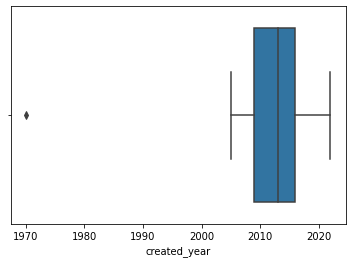

In [29]:
# create boxplot for the 'created_year' column
sns.boxplot(growth_on_date['created_year'])

we can see there is channel that is created in 1970, it seems impossible. This is error that need to be corrected.

In [30]:
# the date of youtube's creation is February 12, 2005
growth_on_date = growth_on_date[growth_on_date['created_year'] > 2005]
growth_on_date

,rank,youtuber,subscribers,video views,category,title,uploads,country,abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,gross tertiary education enrollment (%),population,unemployment rate,urban_population,latitude,longitude
0,1,T-Series,245000000.0,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000.0,0.000000e+00,Film & Animation,youtubemovies,1,United States of America,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000.0,2.836884e+10,Entertainment,MrBeast,741,United States of America,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000.0,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States of America,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000.0,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000.0,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000.0,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000.0,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000.0,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [31]:
# independent variable: Channel creation date (year)
X = growth_on_date['created_year']

# dependent variable: Number of subscribers
y = growth_on_date['subscribers']

# add a constant (intercept) to the independent variable
X = sm.add_constant(X)

# construct linear regression model
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            subscribers   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     19.49
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           1.13e-05
Time:                        21:27:58   Log-Likelihood:                -17460.
No. Observations:                 965   AIC:                         3.492e+04
Df Residuals:                     963   BIC:                         3.493e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.218e+09   2.71e+08      4.499   

In [32]:
# group data by channel creation date and calculate the average number of subscribers for each date
subscribers_by_year = growth_on_date.groupby('created_year')['subscribers'].mean().reset_index()
subscribers_by_year

,created_year,subscribers
0,2006.0,3.188462e+07
1,2007.0,2.490204e+07
2,2008.0,2.365217e+07
3,2009.0,2.310577e+07
4,2010.0,2.067083e+07
5,2011.0,2.180000e+07
6,2012.0,2.403824e+07
7,2013.0,2.452763e+07
8,2014.0,2.061837e+07
9,2015.0,2.124795e+07


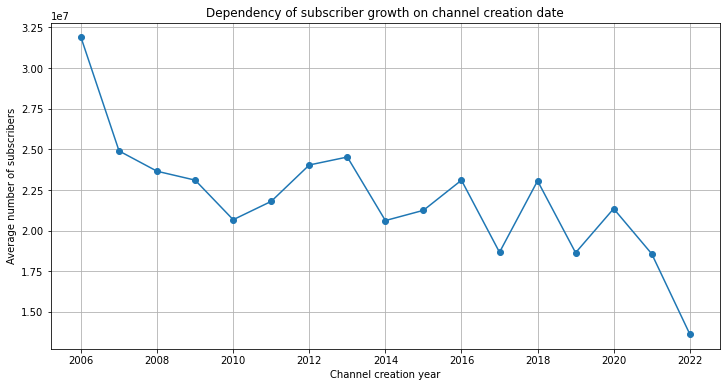

In [33]:
plt.figure(figsize=(12,6))
plt.plot(subscribers_by_year['created_year'], subscribers_by_year['subscribers'], marker='o', linestyle='-')
plt.title('Dependency of subscriber growth on channel creation date')
plt.xlabel('Channel creation year')
plt.ylabel('Average number of subscribers')
plt.grid(True)

plt.show()